Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [231]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [232]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [233]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [234]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
#data_dir_train = pathlib.Path("C:/Users/nawas/repo/AIML/Course/Deep learning/CNN/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
#data_dir_test = pathlib.Path('C:/Users/nawas/repo/AIML/Course/Deep learning/CNN/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

data_dir_train = pathlib.Path("C:/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('C:/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [235]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [236]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [237]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=batch_size, 
    image_size=(img_width, img_height),
    shuffle=True, seed=123,
    validation_split = 0.2,
    subset = 'training',
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [238]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=batch_size, 
    image_size=(img_width, img_height),
    shuffle=True, seed=123,
    validation_split = 0.2,
    subset = 'validation',
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [239]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

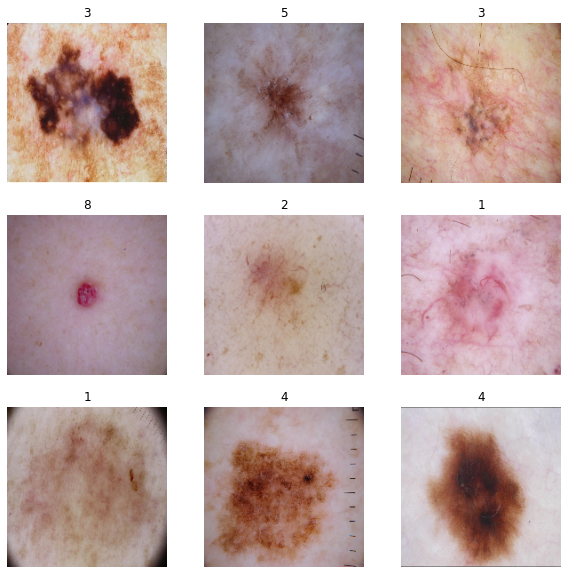

In [240]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [241]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

- Standardize the data

In [242]:
## imports

import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation,Dense, Dropout, MaxPooling2D, Flatten, BatchNormalization, Conv2D 


In [243]:
### Your code goes here
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1.0/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
  layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
  layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [244]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [245]:
# View the summary of all layers
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_16 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 180, 180, 32)      9248      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 90, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 45, 45, 64)      

### Train the model

In [246]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 45ms/step - loss: 2.2318 - accuracy: 0.2394 - val_loss: 1.8838 - val_accuracy: 0.3311
Epoch 2/20
56/56 [==============================] - 2s 35ms/step - loss: 1.8531 - accuracy: 0.3309 - val_loss: 1.6691 - val_accuracy: 0.3803
Epoch 3/20
56/56 [==============================] - 2s 35ms/step - loss: 1.7115 - accuracy: 0.3722 - val_loss: 1.5801 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 2s 35ms/step - loss: 1.7213 - accuracy: 0.3867 - val_loss: 1.7666 - val_accuracy: 0.3468
Epoch 5/20
56/56 [==============================] - 2s 35ms/step - loss: 1.6180 - accuracy: 0.4492 - val_loss: 1.7115 - val_accuracy: 0.3870
Epoch 6/20
56/56 [==============================] - 2s 35ms/step - loss: 1.5702 - accuracy: 0.4464 - val_loss: 1.6374 - val_accuracy: 0.4586
Epoch 7/20
56/56 [==============================] - 2s 35ms/step - loss: 1.5219 - accuracy: 0.4821 - val_loss: 1.5762 - val_accuracy: 0.4832
Epoch 8/20
56

### Visualizing training results

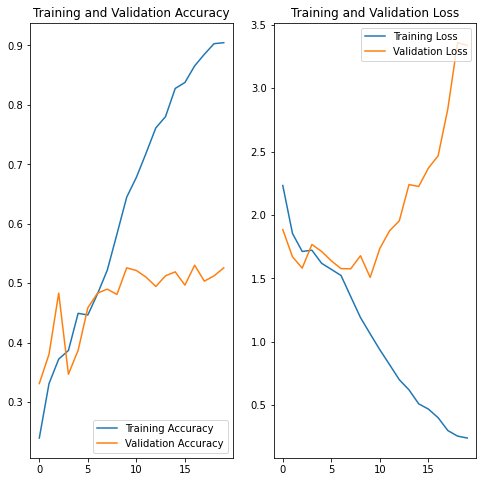

In [247]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Findings:

- Training Loss       : .23
- Validation Loss     : 3.33
- Training Accuracy   : 90%
- Validation Accuracy : 52%

Model is overfitting as :

Training Accuracy is 90 where as Validation Accuracy is 52


### Write your findings here

In [248]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        
    ]
)

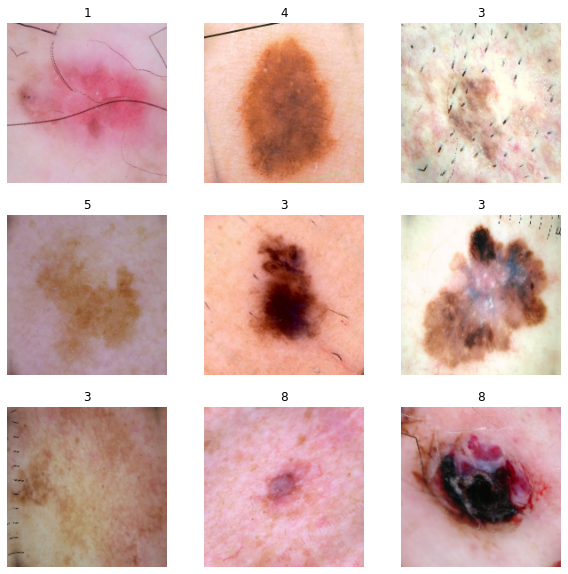

In [249]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        image = images[i].numpy().astype("uint8")
        image = data_augmentation(image)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(int(labels[i]))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [250]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1.0/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
  layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.1),
  layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
  layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.GlobalAveragePooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_classes,activation='softmax')
])



### Compiling the model

In [251]:
## Your code goes here
model2.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

### Training the model

In [252]:
## Your code goes here, note: train your model for 20 epochs
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 39ms/step - loss: 2.0575 - accuracy: 0.1931 - val_loss: 1.9998 - val_accuracy: 0.3065
Epoch 2/20
56/56 [==============================] - 2s 36ms/step - loss: 1.9332 - accuracy: 0.2723 - val_loss: 1.7971 - val_accuracy: 0.3020
Epoch 3/20
56/56 [==============================] - 2s 36ms/step - loss: 1.7412 - accuracy: 0.3237 - val_loss: 1.6906 - val_accuracy: 0.3624
Epoch 4/20
56/56 [==============================] - 2s 36ms/step - loss: 1.7081 - accuracy: 0.3454 - val_loss: 1.7712 - val_accuracy: 0.3311
Epoch 5/20
56/56 [==============================] - 2s 36ms/step - loss: 1.6778 - accuracy: 0.3700 - val_loss: 1.6236 - val_accuracy: 0.3781
Epoch 6/20
56/56 [==============================] - 2s 36ms/step - loss: 1.6325 - accuracy: 0.3711 - val_loss: 1.6132 - val_accuracy: 0.3848
Epoch 7/20
56/56 [==============================] - 2s 36ms/step - loss: 1.6721 - accuracy: 0.3571 - val_loss: 1.6734 - val_accuracy: 0.3557
Epoch 8/20
56

### Visualizing the results

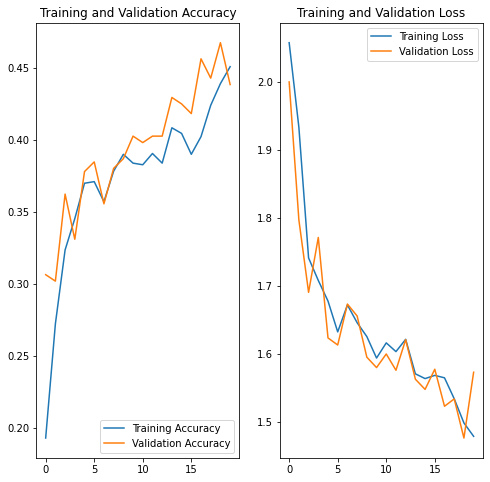

In [253]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Observation :

- Training Loss       : 1.47
- Validation Loss     : 1.57
- Training Accuracy   : 45%
- Validation Accuracy : 43%

Overfitting is solved but there seems to be class imbalance.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [254]:
## Your code goes here.
for i in class_names:
    length=len(list(data_dir_train.glob(i+'/*.jpg')))
    print(f'Class {i} : {length} samples.')

Class actinic keratosis : 114 samples.
Class basal cell carcinoma : 376 samples.
Class dermatofibroma : 95 samples.
Class melanoma : 438 samples.
Class nevus : 357 samples.
Class pigmented benign keratosis : 462 samples.
Class seborrheic keratosis : 77 samples.
Class squamous cell carcinoma : 181 samples.
Class vascular lesion : 139 samples.


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
 Class seborrheic keratosis : 77 samples.

#### - Which classes dominate the data in terms proportionate number of samples?

pigmented benign keratosis, melanoma  and basal cell carcinoma

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [255]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [256]:
path_to_training_dataset=str(data_dir_train)+'/'
print(path_to_training_dataset)
pths=[]
import Augmentor
for i in class_names:
    pths.append(path_to_training_dataset  + i)
print(pths)

for k in pths:
    p = Augmentor.Pipeline(k)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

C:\Skin cancer ISIC The International Skin Imaging Collaboration\Train/
['C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train/actinic keratosis', 'C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train/basal cell carcinoma', 'C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train/dermatofibroma', 'C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train/melanoma', 'C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train/nevus', 'C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train/pigmented benign keratosis', 'C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train/seborrheic keratosis', 'C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train/squamous cell carcinoma', 'C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train/vascular lesion']
Initialised with 114 image(s) found.
Output directory set to C:\Skin cancer ISIC The I

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D137B3E3A0>: 100%|██████████| 500/500 [00:01<00:00, 282.13 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D137B6DF40>: 100%|██████████| 500/500 [00:01<00:00, 282.71 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2D137B1FB20>: 100%|██████████| 500/500 [00:01<00:00, 318.41 Samples/s]


Initialised with 438 image(s) found.
Output directory set to C:\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2D137C164C0>: 100%|██████████| 500/500 [00:08<00:00, 62.22 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to C:\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D137BE54F0>: 100%|██████████| 500/500 [00:08<00:00, 58.42 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to C:\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D136834B50>: 100%|██████████| 500/500 [00:01<00:00, 341.44 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2D13227E820>: 100%|██████████| 500/500 [00:03<00:00, 145.59 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D136799970>: 100%|██████████| 500/500 [00:01<00:00, 320.65 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2D137B2E730>: 100%|██████████| 500/500 [00:01<00:00, 325.93 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [257]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [258]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0b342da9-a927-4d5c-acc6-1445d056e979.jpg',
 'C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_f02fdb41-20cd-46d7-a0ef-ba76266f5e53.jpg',
 'C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_288ea577-2830-489b-bb04-df8418bbd8e3.jpg',
 'C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_e8aa6d27-fbfd-4ce2-a23f-358a8c21386b.jpg',
 'C:\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025953.jpg_2da474c6-7ca0-4626-be65-3c4af8771633.jpg',
 'C:\\Skin cancer ISIC The International Skin Imag

In [259]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [260]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [261]:
for i in class_names:
    length=len(list(data_dir_train.rglob(i+'/**/*.jpg')))
    print(f'Class {i} : {length} samples.')

Class actinic keratosis : 614 samples.
Class basal cell carcinoma : 876 samples.
Class dermatofibroma : 595 samples.
Class melanoma : 938 samples.
Class nevus : 857 samples.
Class pigmented benign keratosis : 962 samples.
Class seborrheic keratosis : 577 samples.
Class squamous cell carcinoma : 681 samples.
Class vascular lesion : 639 samples.


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [262]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [263]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [264]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [269]:
## your code goes here

model3 = Sequential([
  data_augmentation,
  layers.Rescaling(1.0/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
  layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
  layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_classes,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [270]:
## your code goes here
model3.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [272]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 10s 55ms/step - loss: 0.9384 - accuracy: 0.6376 - val_loss: 0.9014 - val_accuracy: 0.6466
Epoch 2/30
169/169 [==============================] - 10s 55ms/step - loss: 0.9041 - accuracy: 0.6521 - val_loss: 1.0147 - val_accuracy: 0.6162
Epoch 3/30
169/169 [==============================] - 10s 57ms/step - loss: 0.9135 - accuracy: 0.6610 - val_loss: 0.9039 - val_accuracy: 0.6526
Epoch 4/30
169/169 [==============================] - 10s 61ms/step - loss: 0.9201 - accuracy: 0.6487 - val_loss: 1.0336 - val_accuracy: 0.6244
Epoch 5/30
169/169 [==============================] - 11s 64ms/step - loss: 0.8533 - accuracy: 0.6756 - val_loss: 0.8125 - val_accuracy: 0.6897
Epoch 6/30
169/169 [==============================] - 12s 66ms/step - loss: 0.8560 - accuracy: 0.6786 - val_loss: 1.0380 - val_accuracy: 0.6110
Epoch 7/30
169/169 [==============================] - 10s 61ms/step - loss: 0.8528 - accuracy: 0.6823 - val_loss: 0.8320 - val_accuracy:

#### **Todo:**  Visualize the model results

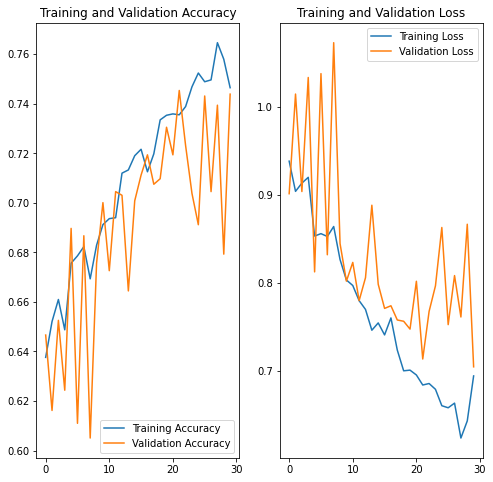

In [273]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

Observations:

Observation :

- Training Loss       : .69
- Validation Loss     : .7
- Training Accuracy   : 74.65%
- Validation Accuracy : 74.39%

By solving class imbalance, we have got rid of underfitting.

